In [19]:
import glob
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np


In [20]:
# specifying the path to csv files
path = "C:/Users/duzie/Documents/Educative/saLys/Sales_Data"
  
# csv files in the path
files = glob.glob(path + "/*.csv")
  
# defining an empty list to store 
# content
data_frame = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    df = pd.read_csv(filename, index_col=None)
    content.append(df)
  
# converting content to data frame
data_frame = pd.concat(content)

In [21]:
data_frame.to_csv("sales_data.csv", index=False)

In [22]:
sales_data = pd.read_csv("sales_data.csv")
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean Data


In [23]:
sales_data.isnull().any()


Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [24]:
df1 = sales_data[sales_data.isna().any(axis=1)]
print(df1)

       Order ID Product Quantity Ordered Price Each Order Date  \
1           NaN     NaN              NaN        NaN        NaN   
356         NaN     NaN              NaN        NaN        NaN   
735         NaN     NaN              NaN        NaN        NaN   
1433        NaN     NaN              NaN        NaN        NaN   
1553        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
185176      NaN     NaN              NaN        NaN        NaN   
185438      NaN     NaN              NaN        NaN        NaN   
186042      NaN     NaN              NaN        NaN        NaN   
186548      NaN     NaN              NaN        NaN        NaN   
186826      NaN     NaN              NaN        NaN        NaN   

       Purchase Address  
1                   NaN  
356                 NaN  
735                 NaN  
1433                NaN  
1553                NaN  
...                 ...  
185176              NaN  

In [25]:
sales_data=sales_data.dropna()

In [26]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [27]:
sales_data = sales_data.loc[sales_data["Order Date"].str[0:2] != "Or"]

#### Best Month For Sales

In [28]:
sales_data["Month"] = sales_data["Order Date"].str[0:2]
sales_data["Month"] = sales_data["Month"].astype('int32')
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [29]:
sales_data["Price Each"] = sales_data["Price Each"].astype('float')
sales_data["Quantity Ordered"] = sales_data["Quantity Ordered"].astype('int32')


In [30]:
sales_data["Sales Price"] = sales_data["Quantity Ordered"]*sales_data["Price Each"]
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Price
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [31]:
sales_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales Price         float64
dtype: object

In [32]:
pd.options.display.float_format = '{:.2f}'.format
month=sales_data.groupby("Month",as_index=False).sum()
month

,Month,Quantity Ordered,Price Each,Sales Price
0,1,10903,1811768.38,1822256.73
1,2,13449,2188884.72,2202022.42
2,3,17005,2791207.83,2807100.38
3,4,20558,3367671.02,3390670.24
4,5,18667,3135125.13,3152606.75
5,6,15253,2562025.61,2577802.26
6,7,16072,2632539.56,2647775.76
7,8,13448,2230345.42,2244467.88
8,9,13109,2084992.09,2097560.13
9,10,22703,3715554.83,3736726.88


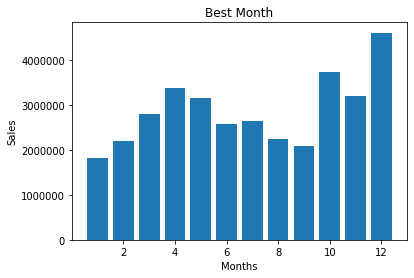

In [33]:
fig, ax = plt.subplots()
ax.bar(month["Month"], month["Sales Price"])

ax.set(xlabel='Months', ylabel='Sales',
       title='Best Month')
ax.grid(False)
plt.show()

#### City with highest number of sales